In [2]:
# Libraries
library(tidyverse)
library(hrbrthemes)
library(kableExtra)
options(knitr.table.format = "html")
library(dplyr)

# Load dataset from github
data <- read.table("https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/7_OneCatOneNum.csv", header=TRUE, sep=",")

# show data
data %>% head(6) %>% kable() %>%
  kable_styling(bootstrap_options = "striped", full_width = F)

<table class="table table-striped" style="width: auto !important; margin-left: auto; margin-right: auto;">
 <thead>
  <tr>
   <th style="text-align:left;"> Country </th>
   <th style="text-align:right;"> Value </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> United States </td>
   <td style="text-align:right;"> 12394 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Russia </td>
   <td style="text-align:right;"> 6148 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> Germany (FRG) </td>
   <td style="text-align:right;"> 1653 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> France </td>
   <td style="text-align:right;"> 2162 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> United Kingdom </td>
   <td style="text-align:right;"> 1214 </td>
  </tr>
  <tr>
   <td style="text-align:left;"> China </td>
   <td style="text-align:right;"> 1131 </td>
  </tr>
</tbody>
</table>

Warning message:
“Removed 10 rows containing missing values (position_stack).”Warning message:
“Removed 10 rows containing missing values (geom_text).”

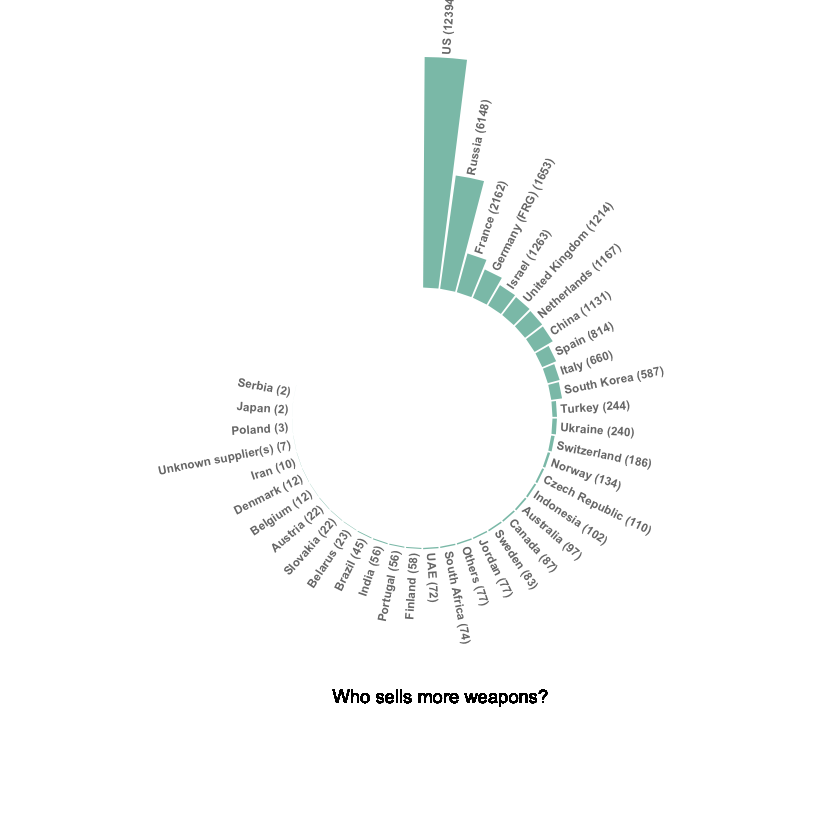

In [3]:
tmp <- data %>%
  filter(!is.na(Value)) %>%
  arrange(desc(Value)) %>%
  mutate(Country=factor(Country, Country))

# Set a number of 'empty bar'
empty_bar=10

# Add lines to the initial tmpset
to_add = matrix(NA, empty_bar, ncol(tmp))
colnames(to_add) = colnames(tmp)
tmp=rbind(tmp, to_add)
tmp$id=seq(1, nrow(tmp))

# Get the name and the y position of each label
label_tmp=tmp
number_of_bar=nrow(label_tmp)
angle= 90 - 360 * (label_tmp$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
label_tmp$hjust<-ifelse( angle < -90, 1, 0)
label_tmp$angle<-ifelse(angle < -90, angle+180, angle)
label_tmp$Country <- gsub("United States", "US", label_tmp$Country)
label_tmp$Country <- paste(label_tmp$Country, " (", label_tmp$Value,")", sep="")

# Make the plot
ggplot(tmp, aes(x=as.factor(id), y=Value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  geom_bar(stat="identity", fill=alpha("#69b3a2", 0.8)) +
  ylim(-7000,13000) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm") 
  ) +
  coord_polar(start = 0) + 
  geom_text(data=label_tmp, aes(x=id, y=Value+200, label=Country ), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_tmp$angle, hjust=label_tmp$hjust, inherit.aes = FALSE ) +
  geom_text( aes(x=24, y=8000, label="Who sells more weapons?"), color="black", inherit.aes = FALSE)